In [1]:
import os 
import matplotlib.pyplot as plot
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import seaborn as sns
import pandas as pd
import csv 
import numpy as np 

In [2]:
def get_data(file_name):
    with open(file_name, 'r') as array3D:
        content = array3D.read()
    
    # Sort data into two variables , one with the image data (scan_array)
    # and another with the meta data for the image. 
    scan_array = []
    meta_data = []

    lines = content.splitlines()#[6:]
    for line in lines:
        columns = line.split('\t')
        if len(columns) < 20:
            meta_data.append(columns)
            continue 
        scan_array.append(columns[0:len(columns)-1]) 

    # convert the scan_array list into a float array. 
    image_array = np.array(scan_array, dtype = np.float)
    
    max_fluorescence = np.max(image_array)
    
    return(image_array, meta_data, max_fluorescence)
    #background = np.mean(image_data)
    #print(background)

In [3]:
def xyz_scales(meta_data):
    # Extract the XYZ scaling information from the meta_data list. 
    xyz = meta_data[10]
    XYZscaling = np.array(xyz[0:len(xyz)-1], dtype = np.float)
    #find the maximum scan length
    scan_maxima = [XYZscaling[2]-XYZscaling[1], 
                   XYZscaling[5]- XYZscaling[4],
                   XYZscaling[8]- XYZscaling[7]]
    #find the size of each voxel/pixel
    voxel_size = np.array([0,3])
    for i in range(len(scan_maxima)):
        voxel_size[0,i] = scan_maxima[i]/int(XYZscaling[0,i*3+3]) 

    # Create the pixle arrays for both the x and y range.
    x_scan = np.linspace(0, scan_maxima[0], int(XYZscaling[3]))
    y_scan = np.linspace(0, scan_maxima[1], int(XYZscaling[6]))
    #z_scan = np.linspace(0, scan_maxima[2], int(XYZscaling[9]))

    return(x_scan, y_scan, voxel_size)

In [4]:
def two_d_meshgrid(x_scan, y_scan, image_data):
    # create a mesh grid fo the heatmap
    X, Y = np.meshgrid(x_scan, y_scan)
    # Put all the data into a pandas data frame. 
    data_array = pd.DataFrame({'x':X.ravel(), 'y':Y.ravel(), 'Counts':image_data.ravel()})
    #the data_array needs to be pivoted to display properly in the heatmap.
    image_frame = data_array.pivot('y', 'x','Counts')
    return(image_frame)

In [5]:
def get_tick_labels(scan_data):
    # Get the values for tick marks incase they are needed for plotting. 
    ticks = [] 
    indicies = []
    for i in range(len(scan_data)):
        if i/20 == np.floor(i/20):
            ticks.append(scan_data[i])
            indicies.append(i)
    
    return(ticks)

In [6]:
def get_scalebar(x_scan, voxel_size, ax):
    # defines the length of the scale bar and its caption.
    scale_bar_pixel_length = 0.1* len(x_scan)
    scale_bar_si_length = round(scale_bar_pixel_length*voxel_size, 1)
    
    #Generate scale bar
    bar = AnchoredSizeBar(ax.transData, scale_bar_pixel_length, 
                          str(scale_bar_si_length) + r'$\mu$m', 
                          4, size_vertical = 1, pad = 0.25)
   # Add scalebar to image
    ax.add_artist(bar)
    
    return(int(scale_bar_pixel_length), scale_bar_si_length)

In [7]:
def plot_heatmap(image_frame, xticks, yticks, max_fluorescence):
    ## This section produces a seaborn heatmap with no x and y labels or tick marks.

    #generate a subpolt.
    fig, ax = plot.subplots()
    # change the plot text sizes. 
    sns.set(rc={'figure.figsize':(12,8)}, font_scale = 1.5)
    # generate the heatmap 
    heat_map = sns.heatmap(image_frame, vmin =0 , vmax = 0.90*max_fluorescence, 
                           cbar_kws = {'label':'\n Counts (per int time)'},
                           xticklabels = 20, yticklabels = 20, cmap = 'viridis')
    # set the tick marks for the heat map.
    ax.set_yticklabels(yticks, rotation = 0)
    ax.set_xticklabels(xticks, rotation = 0)
    # set the x and y labels. 
    ax.set_ylabel('y ' + r'($\mu$m)')
    ax.set_xlabel('x ' + r'($\mu$m)')

    return(fig, ax)


In [8]:
def save_figure(fig):
    fig.savefig('C:\\Users\\Ryan\\Desktop\\20190902_02_xy_labels.jpg')

In [27]:
# Dedicate a file name and then copy all the information into a variable. 
folder_name = 'I:\\Science\\Physics-Nanobiophotonics\\Group\\User Data\\ODMR\\Imaging\\20210414\\'
file_name = '20210414_SRRF_06.dat'
image_array, meta_data, max_fluorescence = get_data(folder_name + file_name)
x_scan, y_scan, voxel_size = xyz_scales(meta_data)
image_frame = two_d_meshgrid(x_scan, y_scan, image_array)
#indicies = []
x_ticks = get_tick_labels(x_scan)
y_ticks = get_tick_labels(y_scan)
fig, ax = plot_heatmap(image_frame, x_ticks, y_ticks, max_fluorescence)
scale_bar_pix, scale_bar_si = get_scalebar(x_scan, voxel_size[0], ax)
#save_figure(fig)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [51]:
## This is code is used to create a altair heat map. 
## This was not persued further due to difficulties in finding the required to
## adapt the plot as required. This heat map may be interesting to persue in future. 

#alt.data_transformers.disable_max_rows()

#alt.Chart(data_array).mark_rect().encode(
#    x='x (um):O',
#    y='y (um):O',
#    color='Counts:Q', 
#).properties(width=500, height=500)

[0.]


In [29]:
plot.imshow(image_array[0,:,:])
print(np.max(image_array)) 

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

0.408


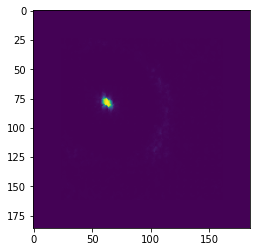

In [24]:
plot.imshow(image_array)
print(np.max(image_array))